<a href="https://colab.research.google.com/github/roquearmas/IABD_DATA/blob/main/MotoresNASA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importo las librerías necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import mean_squared_error, r2_score
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import random
import warnings

warnings.filterwarnings('ignore')

Importo los ficheros de train, test y validation, guardados anteriormente en GitHub



In [3]:
dstrain  = pd.read_csv('https://raw.githubusercontent.com/roquearmas/IABD_DATA/main/train_FD004.txt',sep='\s+',header=None,index_col=False,names=nombres_columnas)
dstest   = pd.read_csv('https://raw.githubusercontent.com/roquearmas/IABD_DATA/main/test_FD004.txt' ,sep='\s+',header=None,index_col=False,names=nombres_columnas)
y_valid  = pd.read_csv('https://raw.githubusercontent.com/roquearmas/IABD_DATA/main/RUL_FD004.txt'  ,sep='\s+',header=None,index_col=False,names=['RUL'])


Defino los nombres de las características

In [2]:
nombres_comunes  = ['numero_unidad', 'ciclo_temporal']
nombres_caracteristicas = ['carac_1', 'carac_2', 'carac_3']
nombres_sensor   = ['sensor_{}'.format(i+1) for i in range(0,21)]
nombres_columnas = nombres_comunes + nombres_caracteristicas + nombres_sensor

Tamaños de los datasets, porcentaje de test con respecto a train

In [4]:
print('Tamaño del dataset de entrenamiento : ',dstrain.shape)
print('Tamaño del dataset de test :          ',dstest.shape)
porcentaje_test = len(dstest)/(len(dstest)+len(dstrain))
print('Porcentaje del dataset de test :     ',f"{porcentaje_test:.3%}")

Tamaño del dataset de entrenamiento :  (61249, 26)
Tamaño del dataset de test :           (41214, 26)
Porcentaje del dataset de test :      40.223%


Observar el número de valores nulos en el dataset de train

In [5]:
print ('Valores no numéricos en el dataset de entrenamiento (total):',dstrain.isna().sum())
# no se detectan valores que no aporten información
print ('Valores no numéricos en el dataset de test (total):',dstest.isna().sum())

Valores no numéricos en el dataset de entrenamiento (total): numero_unidad     0
ciclo_temporal    0
carac_1           0
carac_2           0
carac_3           0
sensor_1          0
sensor_2          0
sensor_3          0
sensor_4          0
sensor_5          0
sensor_6          0
sensor_7          0
sensor_8          0
sensor_9          0
sensor_10         0
sensor_11         0
sensor_12         0
sensor_13         0
sensor_14         0
sensor_15         0
sensor_16         0
sensor_17         0
sensor_18         0
sensor_19         0
sensor_20         0
sensor_21         0
dtype: int64
Valores no numéricos en el dataset de test (total): numero_unidad     0
ciclo_temporal    0
carac_1           0
carac_2           0
carac_3           0
sensor_1          0
sensor_2          0
sensor_3          0
sensor_4          0
sensor_5          0
sensor_6          0
sensor_7          0
sensor_8          0
sensor_9          0
sensor_10         0
sensor_11         0
sensor_12         0
sensor_13     

Elimino las filas que contienen elementos que no son números

In [ ]:
dstrain= dstrain.dropna()
print ('Valores no numéricos en el dataset de entrenamiento (total):',dstrain.isna().sum())

dstest= dstest.dropna()
print ('Valores no numéricos en el dataset de test (total):',dstest.isna().sum())

Valores no numéricos en el dataset de entrenamiento (total): numero_unidad     0
ciclo_temporal    0
carac_1           0
carac_2           0
carac_3           0
sensor_1          0
sensor_2          0
sensor_3          0
sensor_4          0
sensor_5          0
sensor_6          0
sensor_7          0
sensor_8          0
sensor_9          0
sensor_10         0
sensor_11         0
sensor_12         0
sensor_13         0
sensor_14         0
sensor_15         0
sensor_16         0
sensor_17         0
sensor_18         0
sensor_19         0
sensor_20         0
sensor_21         0
dtype: int64
Valores no numéricos en el dataset de test (total): numero_unidad     0
ciclo_temporal    0
carac_1           0
carac_2           0
carac_3           0
sensor_1          0
sensor_2          0
sensor_3          0
sensor_4          0
sensor_5          0
sensor_6          0
sensor_7          0
sensor_8          0
sensor_9          0
sensor_10         0
sensor_11         0
sensor_12         0
sensor_13     

Obtenemos información del dataset con respecto a cada unidad de estudio (motor) respecto a los ciclos temporales que se describen en el fichero.

In [6]:
dstrain.loc[:,['numero_unidad','ciclo_temporal']].describe()

,numero_unidad,ciclo_temporal
count,61249.000000,61249.000000
mean,124.325181,134.311417
std,71.995350,89.783389
min,1.000000,1.000000
25%,60.000000,62.000000
50%,126.000000,123.000000
75%,185.000000,191.000000
max,249.000000,543.000000




Descripción estadística del dataset




In [ ]:
dstrain.loc[:,'sensor_1':].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sensor_1,61249.0,472.882435,26.436832,445.0000,445.0000,462.5400,491.1900,518.6700
sensor_2,61249.0,579.420056,37.342647,535.4800,549.3300,555.7400,607.0700,644.4200
sensor_3,61249.0,1417.896600,106.167598,1242.6700,1350.5500,1367.6800,1497.4200,1613.0000
sensor_4,61249.0,1201.915359,119.327591,1024.4200,1119.4900,1136.9200,1302.6200,1440.7700
sensor_5,61249.0,8.031626,3.622872,3.9100,3.9100,7.0500,10.5200,14.6200
sensor_6,61249.0,11.589457,5.444017,5.6700,5.7200,9.0300,15.4800,21.6100
sensor_7,61249.0,283.328633,146.880210,136.1700,142.9200,194.9600,394.2800,570.8100
sensor_8,61249.0,2228.686034,145.348243,1914.7200,2211.9500,2223.0700,2323.9300,2388.6400
sensor_9,61249.0,8524.673301,336.927547,7984.5100,8320.5900,8362.7600,8777.2500,9196.8100
sensor_10,61249.0,1.096445,0.127681,0.9300,1.0200,1.0300,1.2600,1.3200


Visualizar el mayor ciclo temporal para cada unidad (motor). Se visualiza en qué ciclo temporal falló el motor.


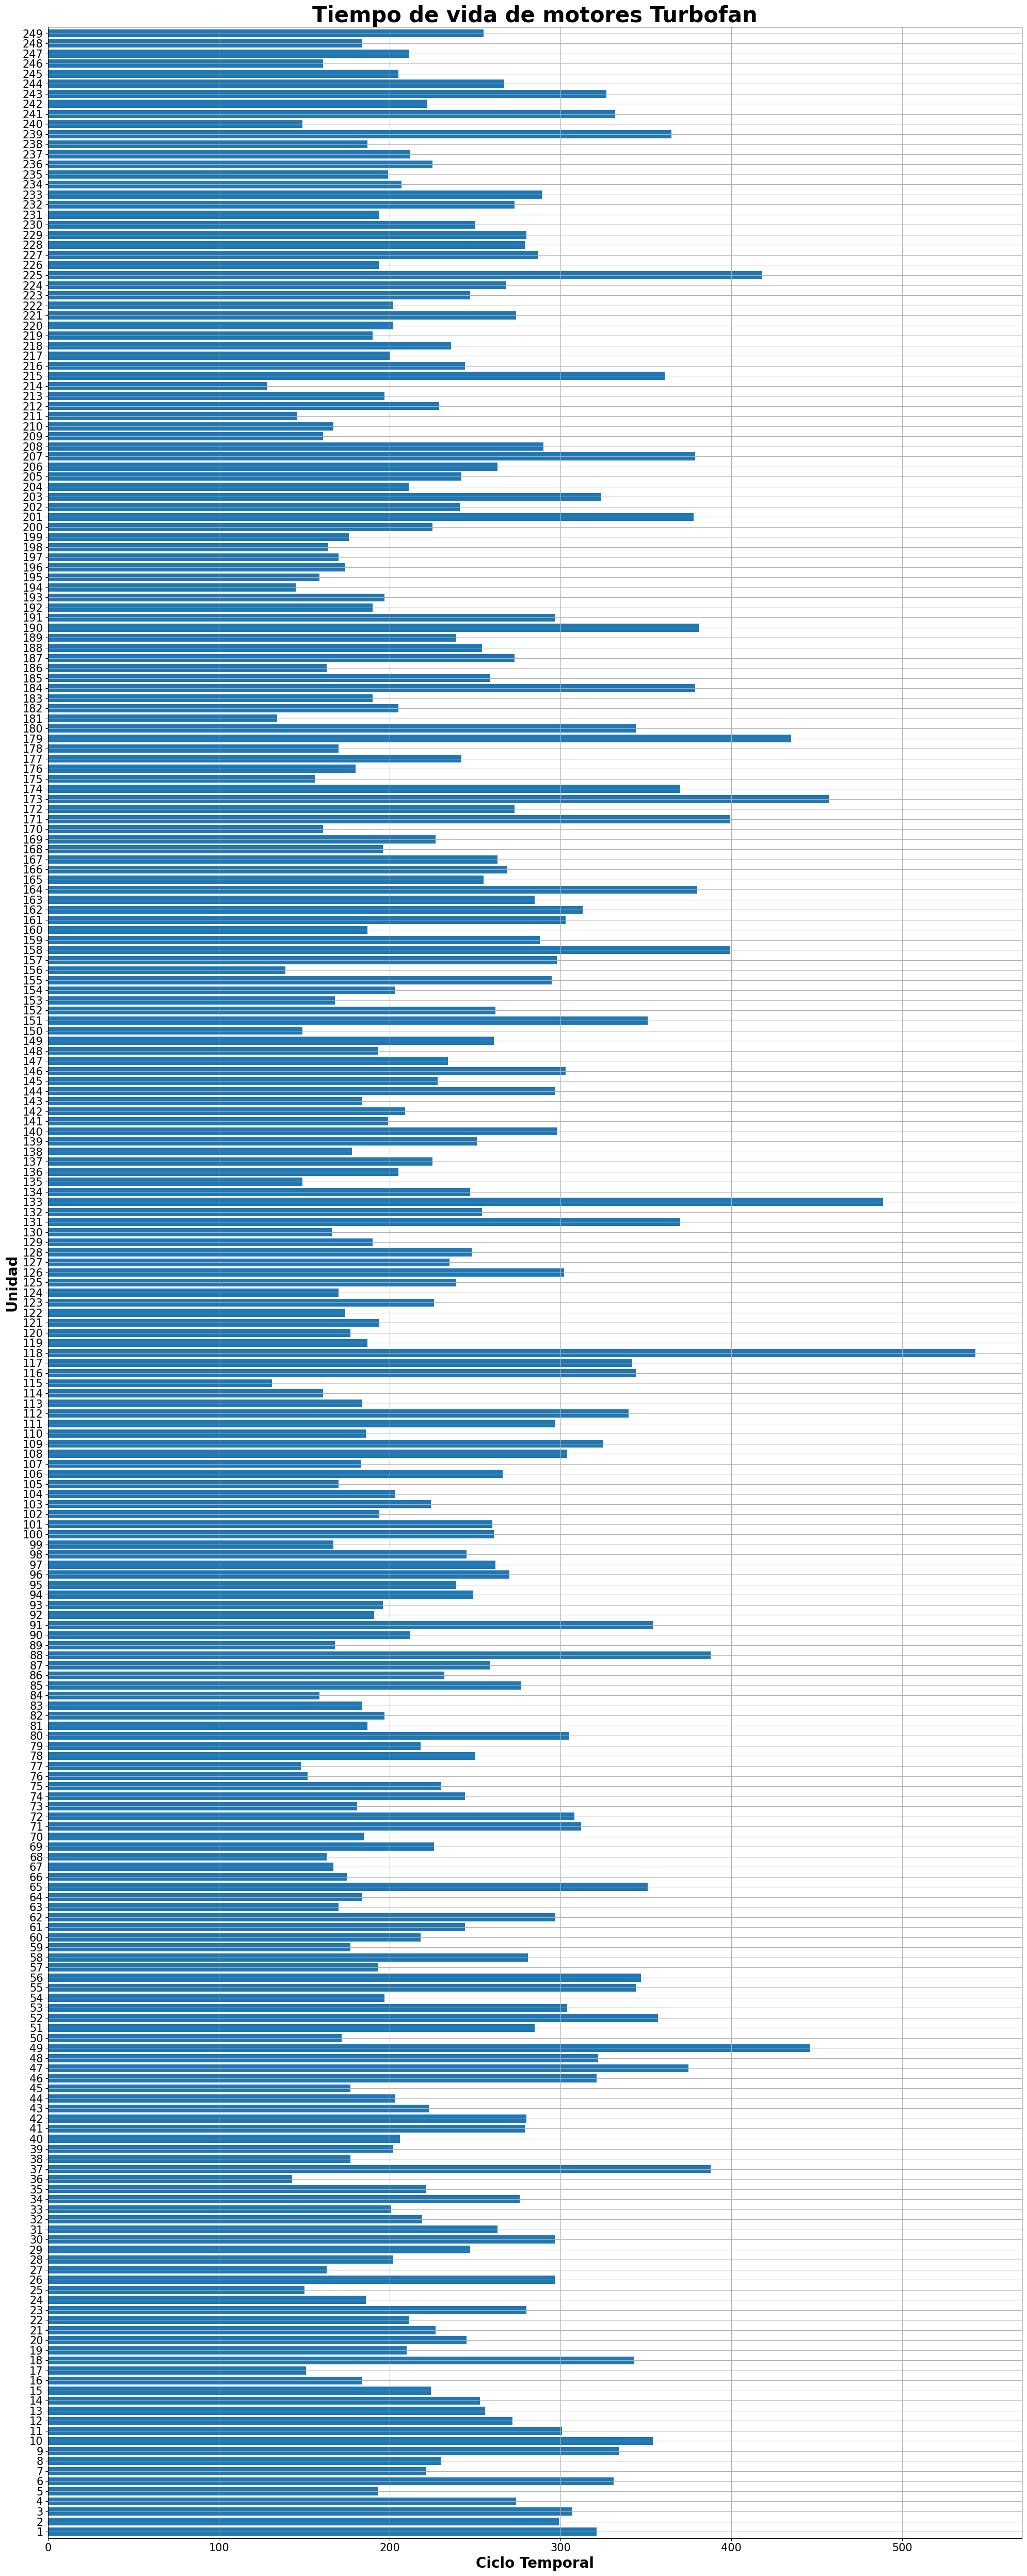

In [7]:
max_time_cycles=dstrain[nombres_comunes].groupby('numero_unidad').max()
plt.figure(figsize=(20,50))
ax=max_time_cycles['ciclo_temporal'].plot(kind='barh',width=0.8, stacked=True,align='center')
plt.title('Tiempo de vida de motores Turbofan',fontweight='bold',size=30)
plt.xlabel('Ciclo Temporal',fontweight='bold',size=20)
plt.xticks(size=15)
plt.ylabel('Unidad',fontweight='bold',size=20)
plt.yticks(size=15)
plt.grid(True)
plt.tight_layout()
plt.show()

Distribución de los ciclos temporales máximos

Text(0.5, 9.444444444444459, 'ciclo temporal máximo')

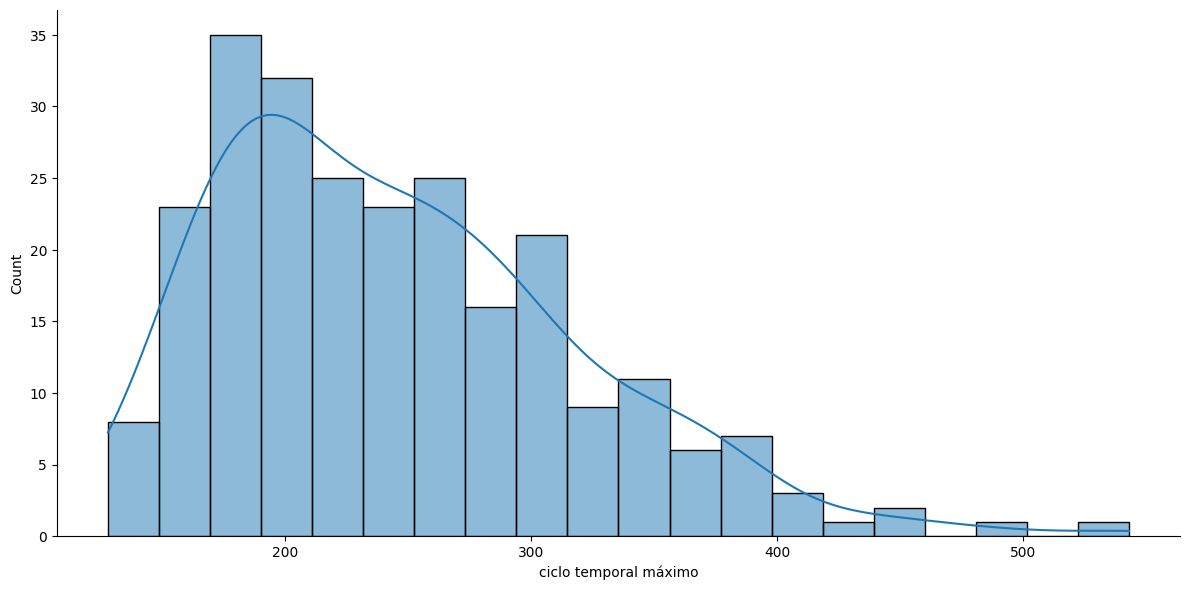

In [8]:
sns.displot(max_time_cycles['ciclo_temporal'],kde=True,bins=20,height=6,aspect=2)
plt.xlabel('ciclo temporal máximo')

Método para añadir la columna ***RUL*** (es la variable que va a ser nuestra y)

El valor ***RUL*** se corresponde con el número de ciclos que le queda a cada motor, antes de que falle.

Cuando el modelo esté entrenado, nos dirá, en un momento determinado de la vida del motor, cuántos ciclos útiles le quedan.


In [9]:
def add_RUL(df):
  train_agrupado_por_unidad = df.groupby(by='numero_unidad')
  ciclo_temporal_max = train_agrupado_por_unidad['ciclo_temporal'].max()
  mezcla = df.merge(ciclo_temporal_max.to_frame(name='ciclo_temporal_max'), left_on='numero_unidad',right_index=True)
  mezcla['RUL'] = mezcla['ciclo_temporal_max'] - mezcla['ciclo_temporal']
  mezcla = mezcla.drop('ciclo_temporal_max', axis=1)
  return mezcla


In [10]:
dstrain = add_RUL(dstrain)
# dstrain[['numero_unidad','RUL']]

dstest=add_RUL(dstest)
dstest[['numero_unidad','RUL']]


,numero_unidad,RUL
0,1,229
1,1,228
2,1,227
3,1,226
4,1,225
...,...,...
41209,248,4
41210,248,3
41211,248,2
41212,248,1


Análisis de los datos con RUL (y). Queremos obtener el número máximo de ciclos que aguanta un motor, hasta que falla.

In [11]:
maxrul = dstrain.groupby('numero_unidad').max().reset_index()
maxrul

,numero_unidad,ciclo_temporal,carac_1,carac_2,carac_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,RUL
0,1,321,42.0079,0.8420,100.0,518.67,643.50,1603.28,1422.53,14.62,...,2388.87,8184.95,10.9141,0.03,397,2388,100.0,39.58,23.8649,320
1,2,299,42.0079,0.8420,100.0,518.67,643.88,1599.51,1434.23,14.62,...,2388.37,8143.04,11.0337,0.03,396,2388,100.0,39.15,23.4692,298
2,3,307,42.0079,0.8420,100.0,518.67,643.45,1605.04,1425.73,14.62,...,2388.91,8188.39,10.8552,0.03,396,2388,100.0,39.51,23.7657,306
3,4,274,42.0080,0.8419,100.0,518.67,644.07,1605.47,1432.75,14.62,...,2389.42,8210.13,11.0113,0.03,397,2388,100.0,39.11,23.4354,273
4,5,193,42.0072,0.8418,100.0,518.67,643.76,1607.29,1430.47,14.62,...,2389.46,8187.83,11.0254,0.03,398,2388,100.0,38.96,23.4060,192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,245,205,42.0080,0.8418,100.0,518.67,643.85,1605.51,1430.77,14.62,...,2388.45,8143.10,11.0135,0.03,397,2388,100.0,39.17,23.5146,204
245,246,161,42.0078,0.8419,100.0,518.67,643.94,1605.65,1426.86,14.62,...,2388.40,8127.50,11.0271,0.03,396,2388,100.0,38.98,23.3750,160
246,247,211,42.0077,0.8420,100.0,518.67,643.56,1607.46,1425.60,14.62,...,2388.76,8181.85,10.9206,0.03,397,2388,100.0,39.44,23.8748,210
247,248,184,42.0076,0.8420,100.0,518.67,643.95,1607.37,1430.34,14.62,...,2388.38,8135.69,11.0088,0.03,397,2388,100.0,38.96,23.4652,183


Saco la matriz de correlación, para determinar las características más relevantes

In [12]:
dstrain.corr()

,numero_unidad,ciclo_temporal,carac_1,carac_2,carac_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,RUL
numero_unidad,1.000000,-0.003656,0.000171,-0.001140,0.003334,0.001516,0.002333,0.002521,0.001785,0.001064,...,0.003360,0.006958,-0.004081,-0.000835,0.002462,0.003400,0.003334,0.001782,0.001788,-0.003656
ciclo_temporal,-0.003656,1.000000,0.000301,0.001033,-0.001814,-0.000688,0.002504,0.023167,0.029306,-0.000489,...,-0.000922,0.097872,-0.027760,0.044364,0.022909,-0.001803,-0.001814,0.002463,0.002475,-0.610620
carac_1,0.000171,0.000301,1.000000,0.943796,-0.028425,-0.964754,-0.868390,-0.787848,-0.839988,-0.987382,...,-0.028443,-0.263960,0.460800,-0.840823,-0.790694,-0.444336,-0.028425,-0.962043,-0.962052,-0.002380
carac_2,-0.001140,0.001033,0.943796,1.000000,-0.066257,-0.886123,-0.811613,-0.761372,-0.837055,-0.933693,...,-0.066236,-0.356085,0.520309,-0.902160,-0.764491,-0.440552,-0.066257,-0.922004,-0.922000,-0.002280
carac_3,0.003334,-0.001814,-0.028425,-0.066257,1.000000,0.163835,0.478659,0.620181,0.544482,0.113471,...,0.999998,0.928067,-0.881196,0.290752,0.616473,0.902830,1.000000,0.276239,0.276147,0.002303
sensor_1,0.001516,-0.000688,-0.964754,-0.886123,0.163835,1.000000,0.944439,0.870606,0.897421,0.986561,...,0.163834,0.353450,-0.542375,0.789447,0.872955,0.572078,0.163835,0.977777,0.977791,0.001889
sensor_2,0.002333,0.002504,-0.868390,-0.811613,0.478659,0.944439,1.000000,0.981750,0.980722,0.916509,...,0.478666,0.624368,-0.776156,0.800320,0.982621,0.809591,0.478659,0.962824,0.962806,-0.004443
sensor_3,0.002521,0.023167,-0.787848,-0.761372,0.620181,0.870606,0.981750,1.000000,0.989744,0.842817,...,0.620227,0.755184,-0.875041,0.801512,0.998693,0.895021,0.620181,0.917055,0.917020,-0.032924
sensor_4,0.001785,0.029306,-0.839988,-0.837055,0.544482,0.897421,0.980722,0.989744,1.000000,0.883579,...,0.544531,0.719325,-0.846000,0.858554,0.990407,0.843615,0.544482,0.945999,0.945965,-0.045881
sensor_5,0.001064,-0.000489,-0.987382,-0.933693,0.113471,0.986561,0.916509,0.842817,0.883579,1.000000,...,0.113473,0.331134,-0.525064,0.824766,0.845583,0.524096,0.113471,0.985677,0.985696,0.001679


Buscamos las posibles correlaciones con mapa de calor
- redondeo a tres decimales, para que la representación sea interpretable

- RdYlGn - Colores del mapa de calor (Rojo(Rd) - Amarillo(Yl) - Verde(Gn)

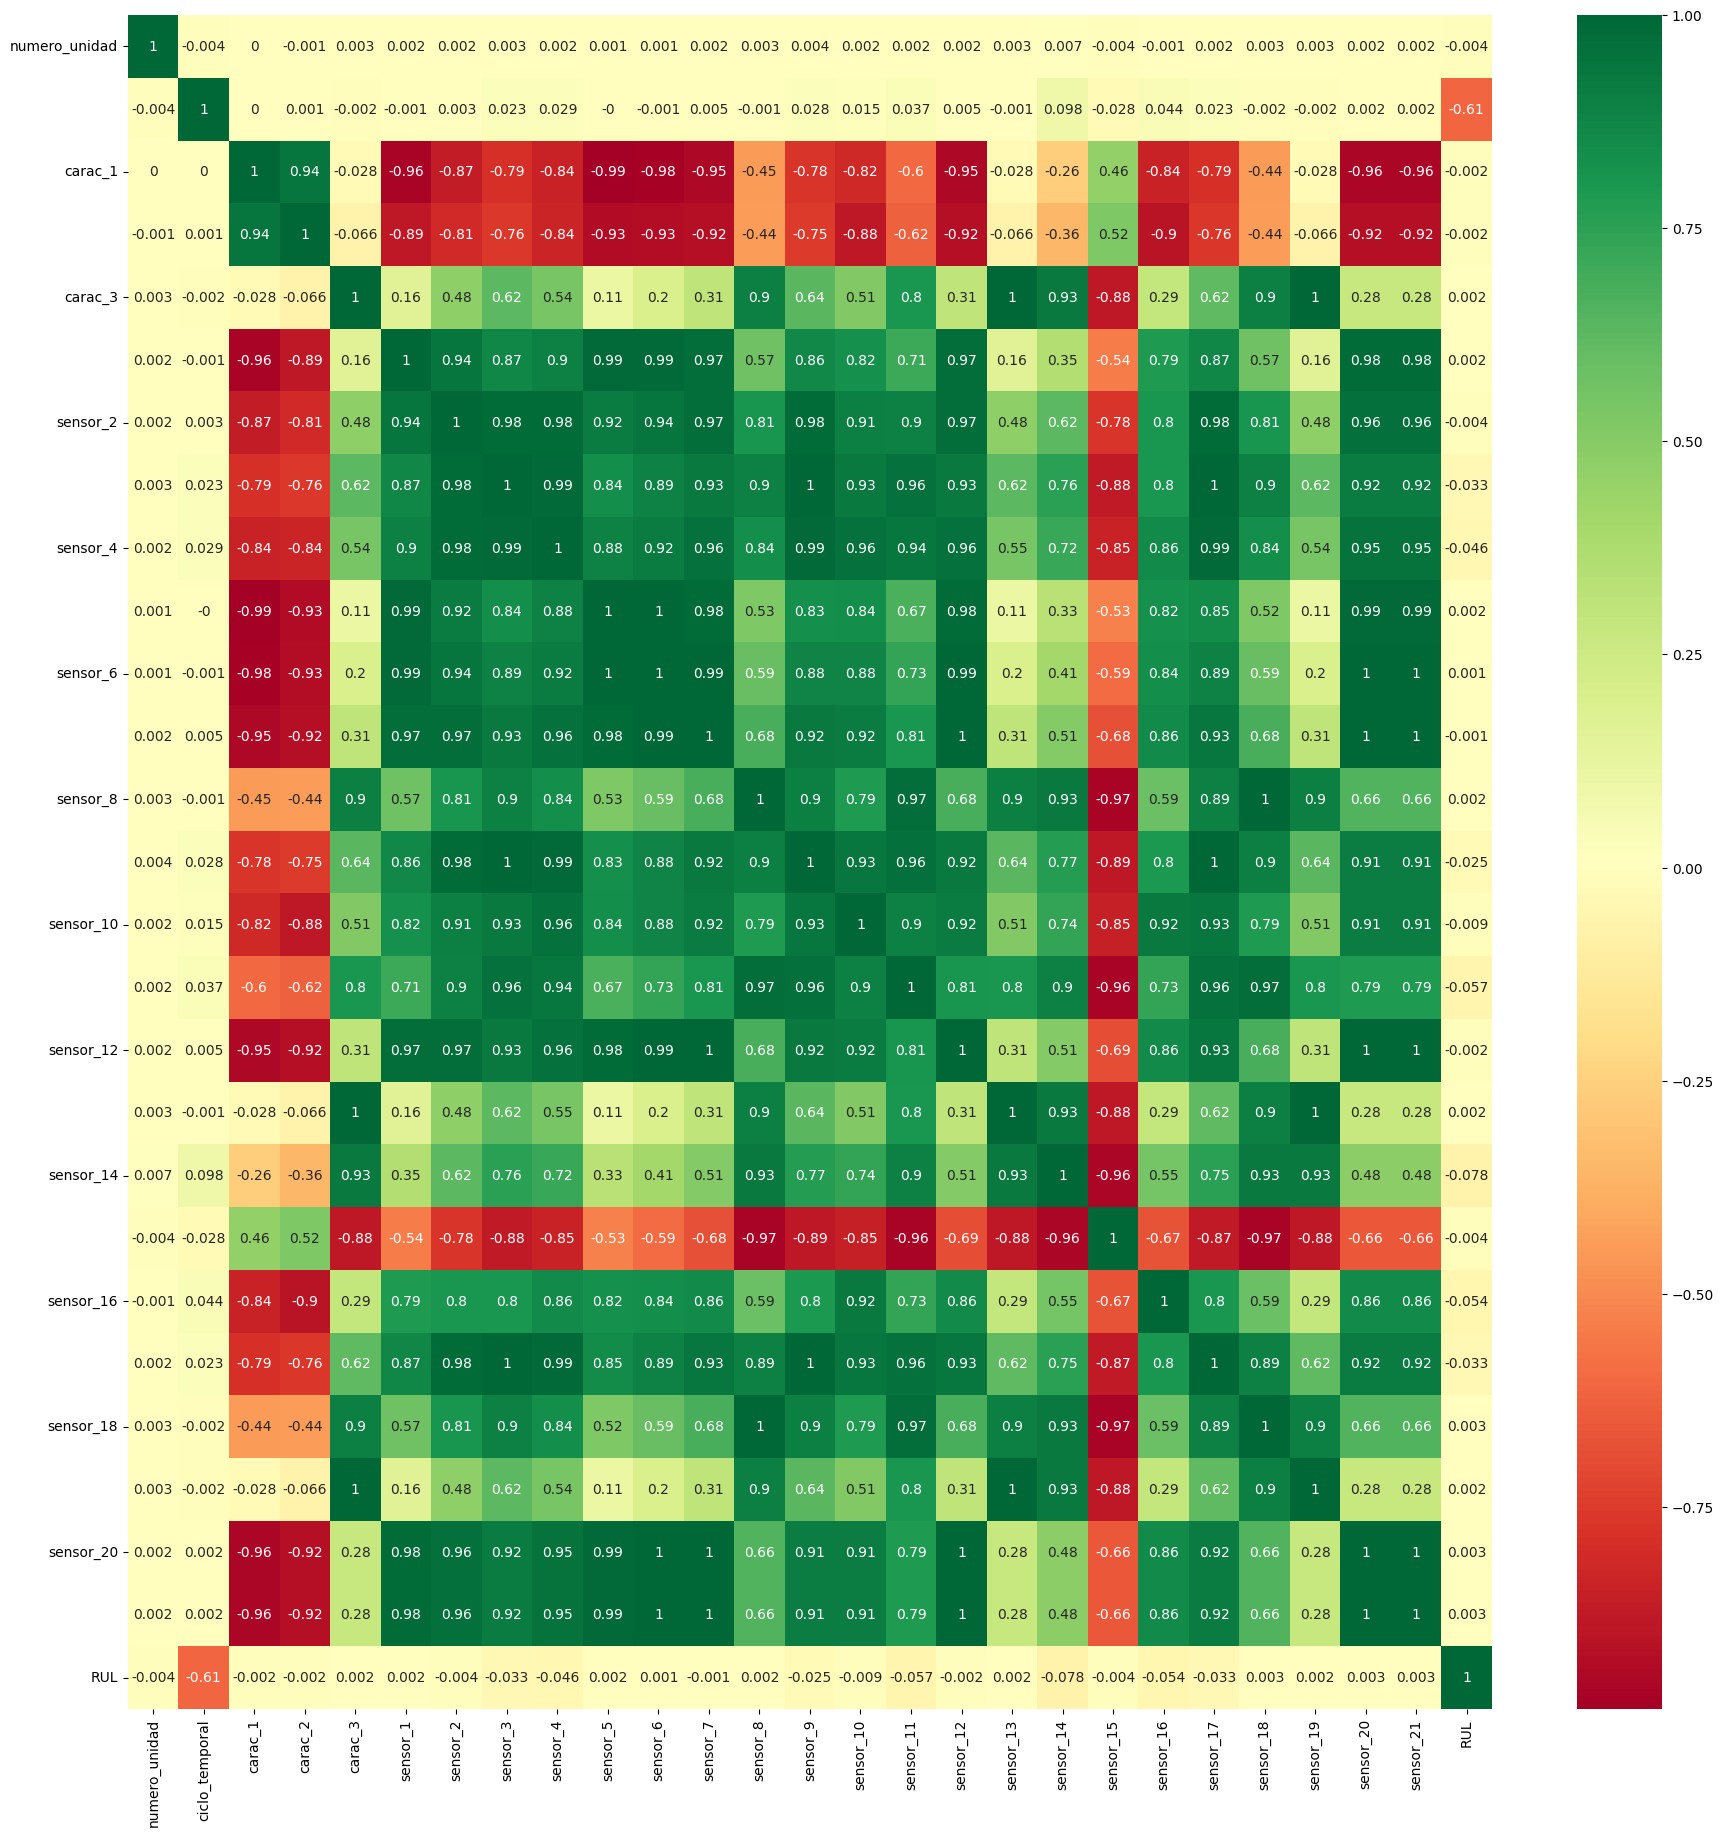

In [13]:
sns.heatmap(dstrain.corr().round(3),annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(22,22) # tamaño de la visualización
plt.show()


Matriz de dispersión(Gráficos de dispersión)

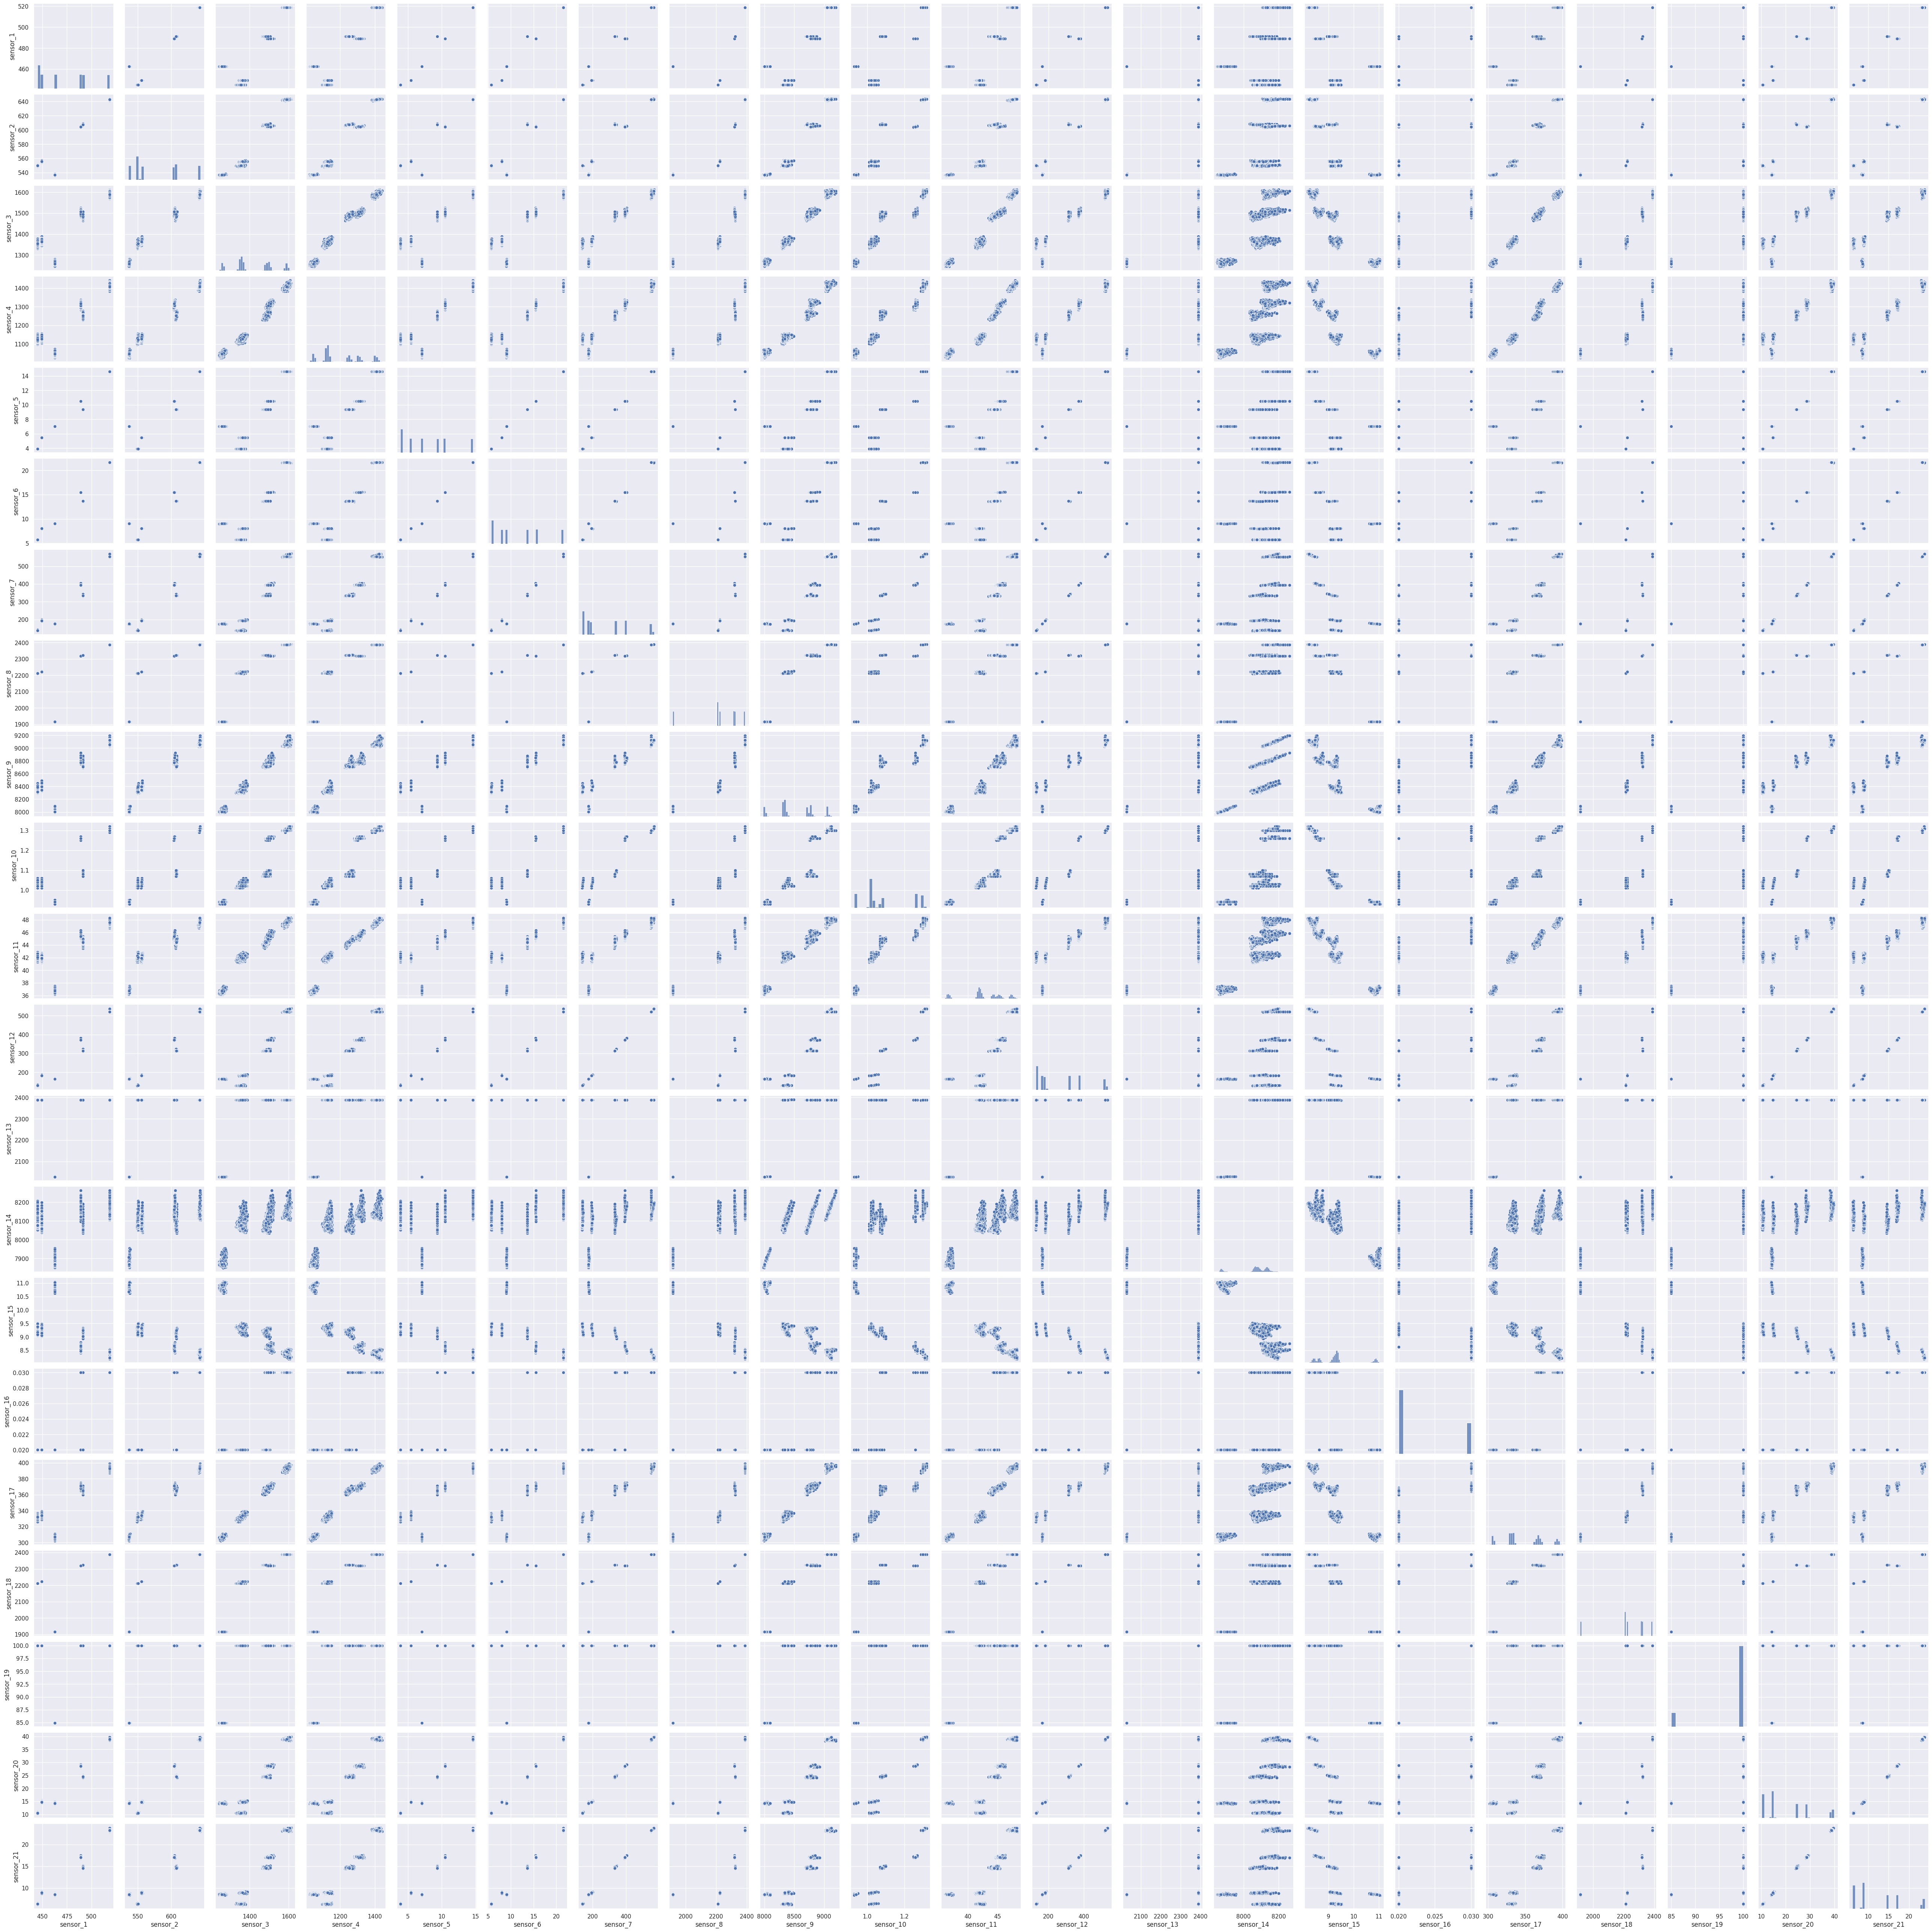

In [ ]:
sns.set()
sns.pairplot(dstrain[nombres_sensor], size = 2.5)
plt.show();

In [14]:

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression

name_features = nombres_caracteristicas + nombres_sensor
X_motores = dstrain[name_features]
y_motores = dstrain['RUL']

X_train_motores, X_test_motores, y_train_motores, y_test_motores = train_test_split(X_motores, y_motores, test_size=.2, random_state=42)

X_train_motores_ar = X_train_motores.to_numpy()
y_train_motores_ar = y_train_motores.to_numpy()
X_test_motores_ar = X_test_motores.to_numpy()
# Usar SelectKBest con f_regression para seleccionar las k características que están más correlacionadas
selector = SelectKBest(f_regression, k=3) # En K le indicamos el número de características que queremos seleccionar

# Muestra las características seleccionadas
X_train_motores_char_selected = selector.fit(X_train_motores_ar, y_train_motores_ar)
# En este ejemplo no excluye ninguna característica al no haber correlación, cuando k=3
char_selected = X_train_motores_char_selected.get_feature_names_out(name_features)

# Con este método selecciona las mejores características y filas que no están correlacionadas
X_train_motores_selected = selector.fit_transform(X_train_motores_ar, y_train_motores_ar)
X_test_motores_selected = selector.transform(X_test_motores_ar)

# Muestra las características seleccionadas
#X_train_motores_char_selected
char_selected

# Una vez seleccionadas las filas y características procederíamos a buscar un modelo y entrenarlo, como se ha hecho hasta ahora.

array(['sensor_11', 'sensor_14', 'sensor_16'], dtype=object)

Nos desembarazamos de las demás columnas

In [15]:
X_motores = dstrain.drop(['carac_1','carac_2','carac_3','sensor_1','sensor_2','sensor_3','sensor_4','sensor_5','sensor_6','sensor_7','sensor_8','sensor_9','sensor_10'], axis=1)
X_motores =X_motores.drop(['sensor_12','sensor_13','sensor_15','sensor_17','sensor_18','sensor_19','sensor_20','sensor_21'], axis=1)
dstest =dstest.drop(['carac_1','carac_2','carac_3','sensor_1','sensor_2','sensor_3','sensor_4','sensor_5','sensor_6','sensor_7','sensor_8','sensor_9','sensor_10'], axis=1)
dstest =dstest.drop(['sensor_12','sensor_13','sensor_15','sensor_17','sensor_18','sensor_19','sensor_20','sensor_21'], axis=1)
X_motores

,numero_unidad,ciclo_temporal,sensor_11,sensor_14,sensor_16,RUL
0,1,1,41.69,8074.83,0.02,320
1,1,2,43.94,8046.13,0.02,319
2,1,3,41.66,8066.62,0.02,318
3,1,4,41.68,8076.05,0.02,317
4,1,5,36.48,7865.80,0.02,316
...,...,...,...,...,...,...
61244,249,251,46.08,8185.69,0.03,4
61245,249,252,48.04,8185.47,0.03,3
61246,249,253,48.24,8193.94,0.03,2
61247,249,254,42.53,8125.64,0.02,1


Entreno el modelo LinearRegression, para predecir los valores

In [26]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Creamos el modelo
model = LinearRegression()

# Entrenamos el modelo
model.fit(X_motores, y_motores)

# Hacemos una predicción
pred = model.predict([[1	,5,	36.48,	7865.80	,0.02,316	]])

# Comprobamos la predicción
print(pred)

pred = model.predict(dstest)

[316.]


Obtenemos la calidad de los resultados obtenidos, mediante las métricas MSE, MAE y MAPE

In [27]:
# 5. Evaluación
from sklearn import metrics
y_test = dstest['RUL']
print('MSE : %.2f' % metrics.mean_squared_error(pred,y_test))
print('MAE : %.2f' % metrics.mean_absolute_error (pred,y_test))
print('MAPE: %.2f' % metrics.mean_absolute_percentage_error(pred, y_test))

MSE : 0.00
MAE : 0.00
MAPE: 0.01


Aplico KNeighborsRegressor

In [ ]:
MSE_minimo=200
MAE_minimo=10
MAPE_minimo=2
for k in range(1,101):
  w = "distance"

  # 1. elegir regresor
  from sklearn.neighbors import KNeighborsRegressor
  # 2. instanciar el modelo
  regr = KNeighborsRegressor(k, weights=w)
  # 3. entrenamiento con los datos
  regr.fit(X_motores, y_motores)
  # 4. predicción con nuevos datos
  pred = regr.predict(dstest)
  if metrics.mean_squared_error(pred,y_test)<MSE_minimo:
    MSE_minimo=metrics.mean_squared_error(pred,y_test)
    print ('MSE minimo con %i vecinos, %2f' %(k,MSE_minimo))
  if metrics.mean_absolute_error (pred,y_test)<MAE_minimo:
    MAE_minimo=metrics.mean_absolute_error (pred,y_test)
    print ('MAE minimo con %i vecinos, %2f' %(k,MAE_minimo))
  if metrics.mean_absolute_percentage_error(pred, y_test)<MAPE_minimo:
    MAPE_minimo=metrics.mean_absolute_percentage_error(pred, y_test)
    print ('MAPE minimo con %i vecinos, %2f' %(k,MAPE_minimo))


Obtengo valores minimos para k=10 y w='distance'

In [41]:
k=10
w = "distance"

# 1. elegir regresor
from sklearn.neighbors import KNeighborsRegressor
# 2. instanciar el modelo
regr = KNeighborsRegressor(k, weights=w)
# 3. entrenamiento con los datos
regr.fit(X_motores, y_motores)
# 4. predicción con nuevos datos
pred = regr.predict(dstest)
MSE=metrics.mean_squared_error(pred,y_test)
print ('MSE : %2f' %(MSE))
MAE=metrics.mean_absolute_error (pred,y_test)
print ('MAE : %2f' %(MAE))
MAPE=metrics.mean_absolute_percentage_error(pred, y_test)
print ('MAPE: %2f' %(MAPE))


MSE : 150.694632
MAE : 7.308128
MAPE: 0.132625


Text(0, 0.5, 'Ciclos predichos')

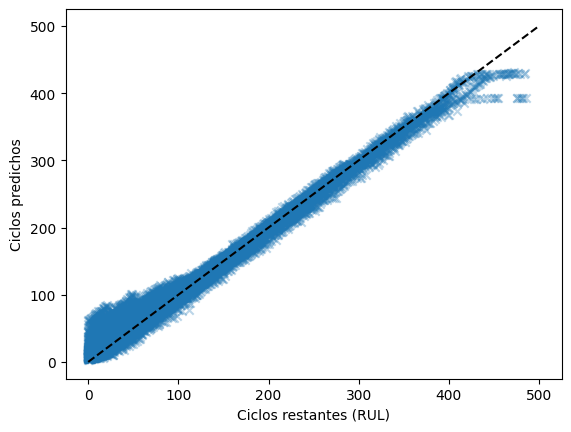

In [ ]:
plt.scatter(y_test, pred , alpha = 0.3, marker = 'x')
plt.plot([0, 500], [0, 500], "--k")
plt.axis("tight")
plt.xlabel("Ciclos restantes (RUL)")
plt.ylabel("Ciclos predichos")

Aplico Cross-Validation

In [45]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

#Divide los datos en n_splits partes, de manera aleatoria (shuffle)
cv = KFold(n_splits = 10, shuffle = True)
cv_mape=[]
for i in range(2,21):
  for cv_train, cv_test in cv.split(X_motores):
    # Sacamos la información de X y de Y, según las medidas dadas por la separación Kfold
    cv_train_x = X_motores.iloc[cv_train]
    cv_train_y = y_motores.iloc[cv_train]

    # vamos entrenando los modelos
    model.fit(cv_train_x, cv_train_y)

    #guardo el predict de cada modelo
    y_pred = model.predict(X_motores.iloc[cv_test])
    #y_np=np.zeros(len(cv_test))
    y_np=y_motores.iloc[cv_test].values
    #mae = metrics.mean_absolute_error (y_pred,y_np)
    mape = metrics.mean_absolute_percentage_error(  y_pred,y_np)
    #voy guardando las accuracys
    cv_mape.append(mape)
  #guardo la media de los mapes, para cada split
  media_mape=sum(cv_mape)/len(cv_mape)

  #recorro los clasificadores y voy mostrando la precision por cada uno de ellos
  print ("MAE medio: = %.4f para %i splits" %  (media_mape,i ))


MAE medio: = 0.0041 para 2 splits
MAE medio: = 0.0041 para 3 splits
MAE medio: = 0.0041 para 4 splits
MAE medio: = 0.0041 para 5 splits
MAE medio: = 0.0041 para 6 splits
MAE medio: = 0.0041 para 7 splits
MAE medio: = 0.0041 para 8 splits
MAE medio: = 0.0041 para 9 splits
MAE medio: = 0.0041 para 10 splits
MAE medio: = 0.0041 para 11 splits
MAE medio: = 0.0041 para 12 splits
MAE medio: = 0.0041 para 13 splits
MAE medio: = 0.0041 para 14 splits
MAE medio: = 0.0041 para 15 splits
MAE medio: = 0.0041 para 16 splits
MAE medio: = 0.0041 para 17 splits
MAE medio: = 0.0041 para 18 splits
MAE medio: = 0.0041 para 19 splits
MAE medio: = 0.0041 para 20 splits


In [ ]:
print(type(y_np))
print(type(y_pred))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
